# 6.5 Unsupervised Machine Learning - Clustering

#### This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

### 1. Imporing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\miche\DA_Obesity and COVID19\Achievement 06 Notes_Tasks_Data\Obesity Rates and Demographics.csv")

In [4]:
df.shape

(559, 25)

In [5]:
df.head()

,Year,State,Obesity Rate % Overall,Obese % Age 18-24,Obese % Age 25-34,Obese % Age 35-44,Obese % Age 45-54,Obese % Age 55-64,Obese % Age 65+,Obese % Education Less than HS,...,Obese % Income $25-34k,Obese % Income $35-49k,Obese % Income $50k+,Obese % Race White,Obese % Race Black,Obese % Race Hispanic,Obese % Female,Obese % Male,Latitude,Longitude
0,2011,Alabama,32.00,16.30,35.20,35.50,38.00,36.4,27.10,33.60,...,35.80,32.30,30.90,29.80,40.10,28.60,31.80,32.30,32.840571,-86.631861
1,2012,Alabama,33.00,23.90,31.30,34.30,39.70,40.2,26.90,35.20,...,29.00,34.50,31.30,30.10,44.10,24.10,34.10,31.80,32.840571,-86.631861
2,2013,Alabama,32.40,19.00,30.40,36.70,40.00,37.1,28.40,33.80,...,33.10,31.10,30.50,29.60,41.30,28.20,34.00,30.90,32.840571,-86.631861
3,2014,Alabama,33.50,20.40,31.70,40.90,39.90,37.4,28.90,34.80,...,35.40,35.50,31.50,31.40,41.90,22.90,32.90,34.10,32.840571,-86.631861
4,2015,Alabama,35.63,25.06,35.18,41.05,40.58,40.3,30.15,38.44,...,38.81,36.48,33.42,32.33,46.41,31.41,36.38,34.87,32.840571,-86.631861


In [6]:
# Check for missing values
df.isnull().sum()

Year                                0
State                               0
Obesity Rate % Overall              0
Obese % Age 18-24                   6
Obese % Age 25-34                   0
Obese % Age 35-44                   0
Obese % Age 45-54                   0
Obese % Age 55-64                   0
Obese % Age 65+                     0
Obese % Education Less than HS      0
Obese % Education HS or GED         0
Obese % Education Some post HS      0
Obese % Education College Grad      0
Obese % Income Under $15k           0
Obese % Income $15-24k              0
Obese % Income $25-34k              0
Obese % Income $35-49k              0
Obese % Income $50k+                0
Obese % Race White                  0
Obese % Race Black                103
Obese % Race Hispanic              28
Obese % Female                      0
Obese % Male                        0
Latitude                            0
Longitude                           0
dtype: int64

In [7]:
# Drop Columns with missing values
df=df.drop(columns = ['State','Obese % Age 18-24','Obese % Race Black','Obese % Race Hispanic'])

### 2. The Elbow Technique

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\miche\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[-441102.2259014251,
 -275460.76837800874,
 -191881.16522332927,
 -159018.34444587218,
 -137302.82122608734,
 -120692.28765099427,
 -106704.96550113837,
 -97109.28171843296,
 -91517.79128452904]

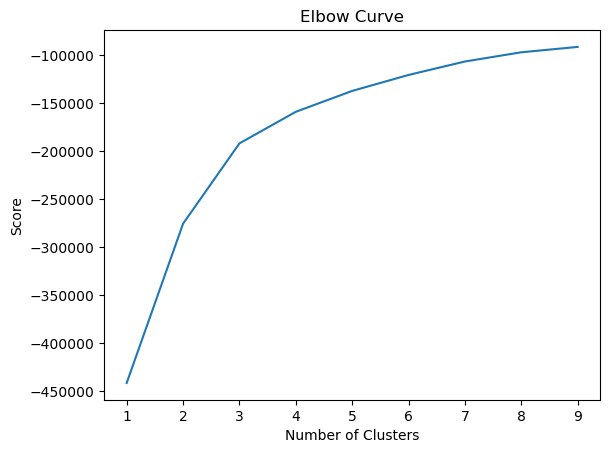

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the Elbow Curve, it appears that the optimal count for clusters is three.

### 3. k-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [14]:
df['clusters'] = kmeans.fit_predict(df)

In [15]:
df.head()

,Year,Obesity Rate % Overall,Obese % Age 25-34,Obese % Age 35-44,Obese % Age 45-54,Obese % Age 55-64,Obese % Age 65+,Obese % Education Less than HS,Obese % Education HS or GED,Obese % Education Some post HS,...,Obese % Income $15-24k,Obese % Income $25-34k,Obese % Income $35-49k,Obese % Income $50k+,Obese % Race White,Obese % Female,Obese % Male,Latitude,Longitude,clusters
0,2011,32.00,35.20,35.50,38.00,36.4,27.10,33.60,32.80,33.80,...,34.80,35.80,32.30,30.90,29.80,31.80,32.30,32.840571,-86.631861,1
1,2012,33.00,31.30,34.30,39.70,40.2,26.90,35.20,33.50,34.40,...,35.20,29.00,34.50,31.30,30.10,34.10,31.80,32.840571,-86.631861,1
2,2013,32.40,30.40,36.70,40.00,37.1,28.40,33.80,32.10,35.20,...,36.60,33.10,31.10,30.50,29.60,34.00,30.90,32.840571,-86.631861,1
3,2014,33.50,31.70,40.90,39.90,37.4,28.90,34.80,35.40,34.40,...,40.60,35.40,35.50,31.50,31.40,32.90,34.10,32.840571,-86.631861,1
4,2015,35.63,35.18,41.05,40.58,40.3,30.15,38.44,37.64,36.49,...,39.29,38.81,36.48,33.42,32.33,36.38,34.87,32.840571,-86.631861,1


In [16]:
df['clusters'].value_counts()

1    231
0    178
2    150
Name: clusters, dtype: int64

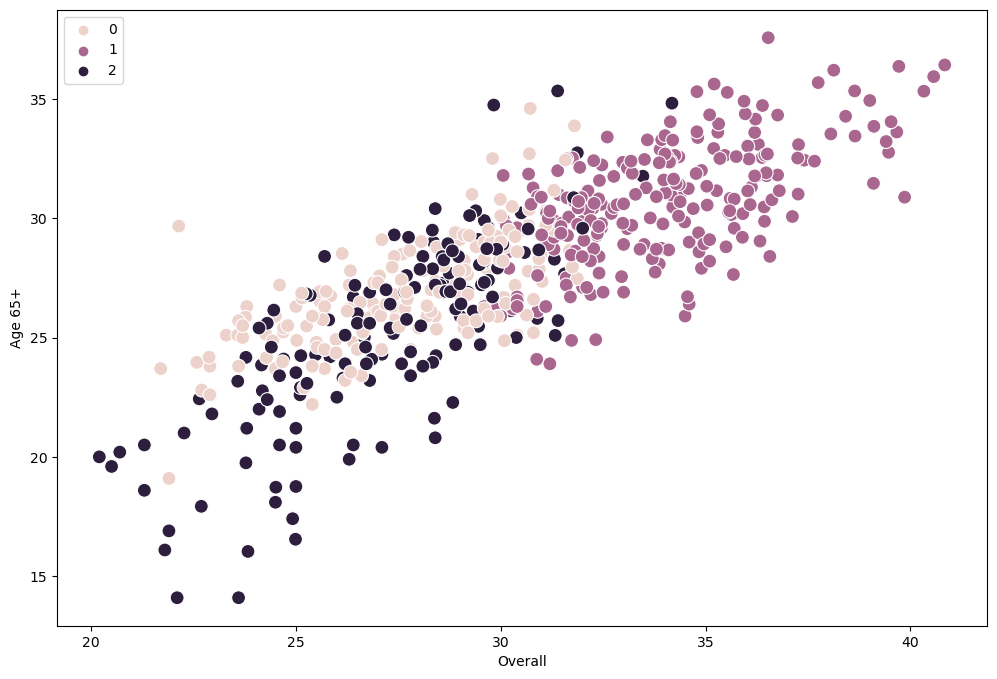

In [17]:
# Plot the clusters for the "Obesity Overall" and "Obese Age 65+" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Obesity Rate % Overall'], y=df['Obese % Age 65+'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Overall') # Label x-axis.
plt.ylabel('Age 65+') # Label y-axis.
plt.show()

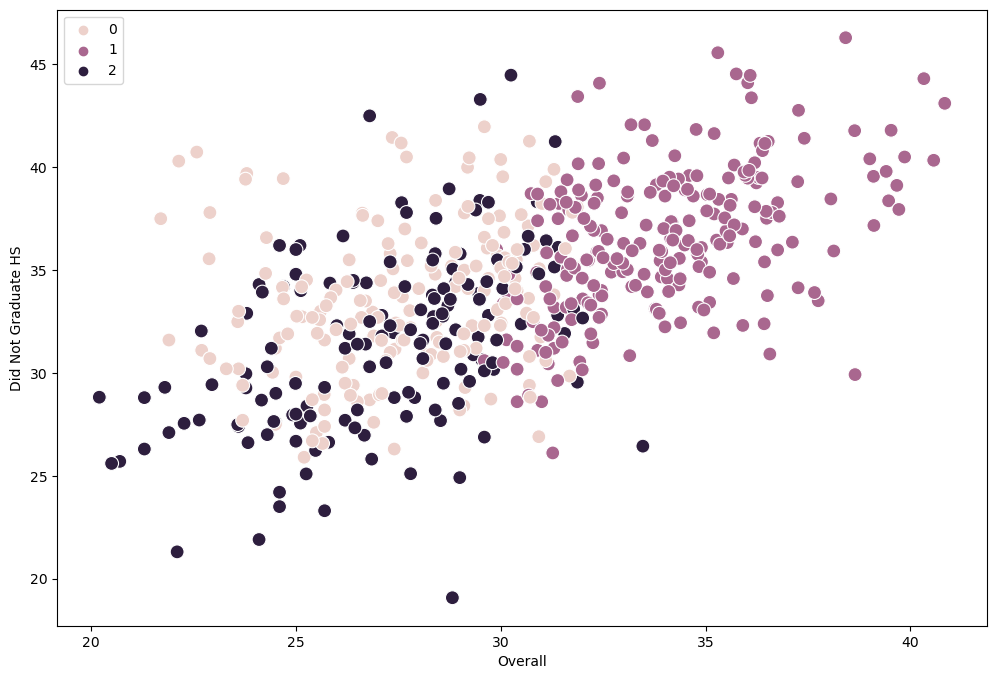

In [18]:
# Plot the clusters for the "Obesity Overall" and "Obese Education" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Obesity Rate % Overall'], y=df['Obese % Education Less than HS'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Overall') # Label x-axis.
plt.ylabel('Did Not Graduate HS') # Label y-axis.
plt.show()

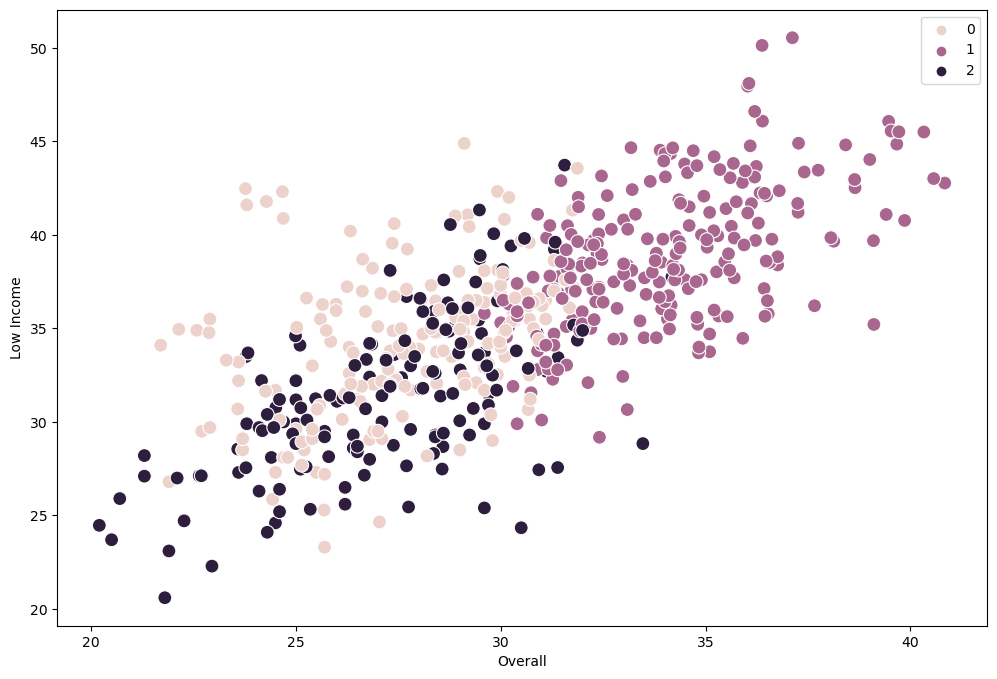

In [19]:
# Plot the clusters for the "Obesity Overall" and "Obese Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Obesity Rate % Overall'], y=df['Obese % Income Under $15k'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Overall') # Label x-axis.
plt.ylabel('Low Income') # Label y-axis.
plt.show()

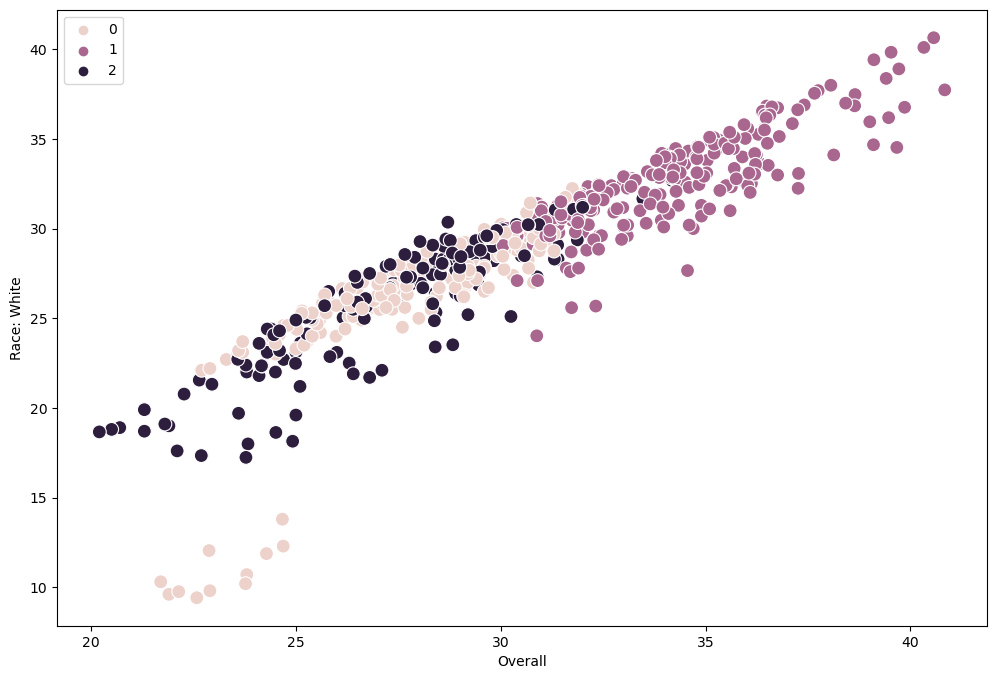

In [21]:
# Plot the clusters for the "Obesity Overall" and "Obese Race" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Obesity Rate % Overall'], y=df['Obese % Race White'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Overall') # Label x-axis.
plt.ylabel('Race: White') # Label y-axis.
plt.show()

In [23]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
df.groupby('cluster').agg({'Obesity Rate % Overall':['mean', 'median'], 
                         'Obese % Age 65+':['mean', 'median'], 
                         'Obese % Education Less than HS':['mean', 'median'],
                          'Obese % Income Under $15k':['mean', 'median'],
                          'Obese % Race White':['mean','median']})

Obesity Rate % Overall        Obese % Age 65+          \
                              mean median            mean  median   
cluster                                                             
dark purple              27.205800  27.68       25.174267  25.655   
pink                     27.696011  27.71       26.888539  26.610   
purple                   33.984589  33.92       30.717706  30.700   

            Obese % Education Less than HS         Obese % Income Under $15k  \
                                      mean  median                      mean   
cluster                                                                        
dark purple                      31.475600  31.670                 31.476333   
pink                             33.532247  33.435                 34.214607   
purple                           36.490823  36.380                 38.821775   

                   Obese % Race White         
            median               mean median  
cluster                                       
dark purple  31.34          25.770067  26.40  
pink         34.55          26.108258  26.80  
purple       38.48          32.486147  32.33